In [15]:
import sys 
sys.path.append('../datamodules')
import multiprocessing

import torch 
from torch.utils.data import DataLoader, get_worker_info

from dm_xarray import SEGYDataset, worker_init_fn

In [16]:
config_path = '../config/config_random_denoising.yaml'
segy_filename = 'MP41B_PSTM_STK_RND.sgy'


    # dm = SEGYDataModule(segy_filename, config_path)
    # gc.collect()
    # prepare_data_xarray(config_path, segy_filename)
    # gc.collect()
    # calculate_global_stats(segy_filename, config_path)
    # gc.collect()
    # create_patch_index(segy_filename, config_path)
    # gc.collect()
dataset = SEGYDataset(segy_filename = segy_filename, config_path = config_path, mode='train')
dataloader = DataLoader(dataset, 32, num_workers=8, worker_init_fn=worker_init_fn, pin_memory=True)



In [17]:
batch = next(iter(dataloader))

worker initialised
worker initialised
worker initialised
worker initialised
worker initialisedworker initialised

worker initialised
worker initialised
Data loading started with  42500  samples per epoch per worker
patch index  30450
Data loading started with  42500  samples per epoch per worker
patch index  18184
[[ 3.7440000e+03  6.1960000e+03  8.4720000e+03 ...  2.5080000e+03
   4.6975000e+02 -1.5630000e+03]
 [ 3.6460000e+03  5.9240000e+03  8.0480000e+03 ...  1.5790000e+03
  -3.3900000e+02 -2.1040000e+03]
 [ 3.6860000e+03  5.7920000e+03  7.7280000e+03 ...  8.5650000e+02
  -9.8350000e+02 -2.5540000e+03]
 ...
 [ 1.0560000e+03  1.0240000e+03  1.1140000e+03 ...  2.6300000e+02
   1.2880000e+03  2.5700000e+03]
 [ 8.0950000e+02  9.0850000e+02  1.1380000e+03 ...  6.1679688e+00
   1.1900000e+03  2.6240000e+03]
 [ 6.2000000e+02  8.7300000e+02  1.2530000e+03 ... -1.7712500e+02
   1.1360000e+03  2.6840000e+03]]
float32
yielding patch at inline, xline start, twt_start :(1157.0, 1165.0, 4800.0)
[

In [18]:
# batch examination 
noisy_batch = batch[0]
clean_batch = batch[1]
noise = batch[2]

display(noisy_batch.shape, clean_batch.shape, )
display(torch.min(noisy_batch), torch.max(noisy_batch))
display(torch.min(clean_batch), torch.max(clean_batch))

torch.Size([32, 1, 32, 32])

torch.Size([32, 1, 32, 32])

tensor(-1.)

tensor(1.)

tensor(-1.)

tensor(1.)

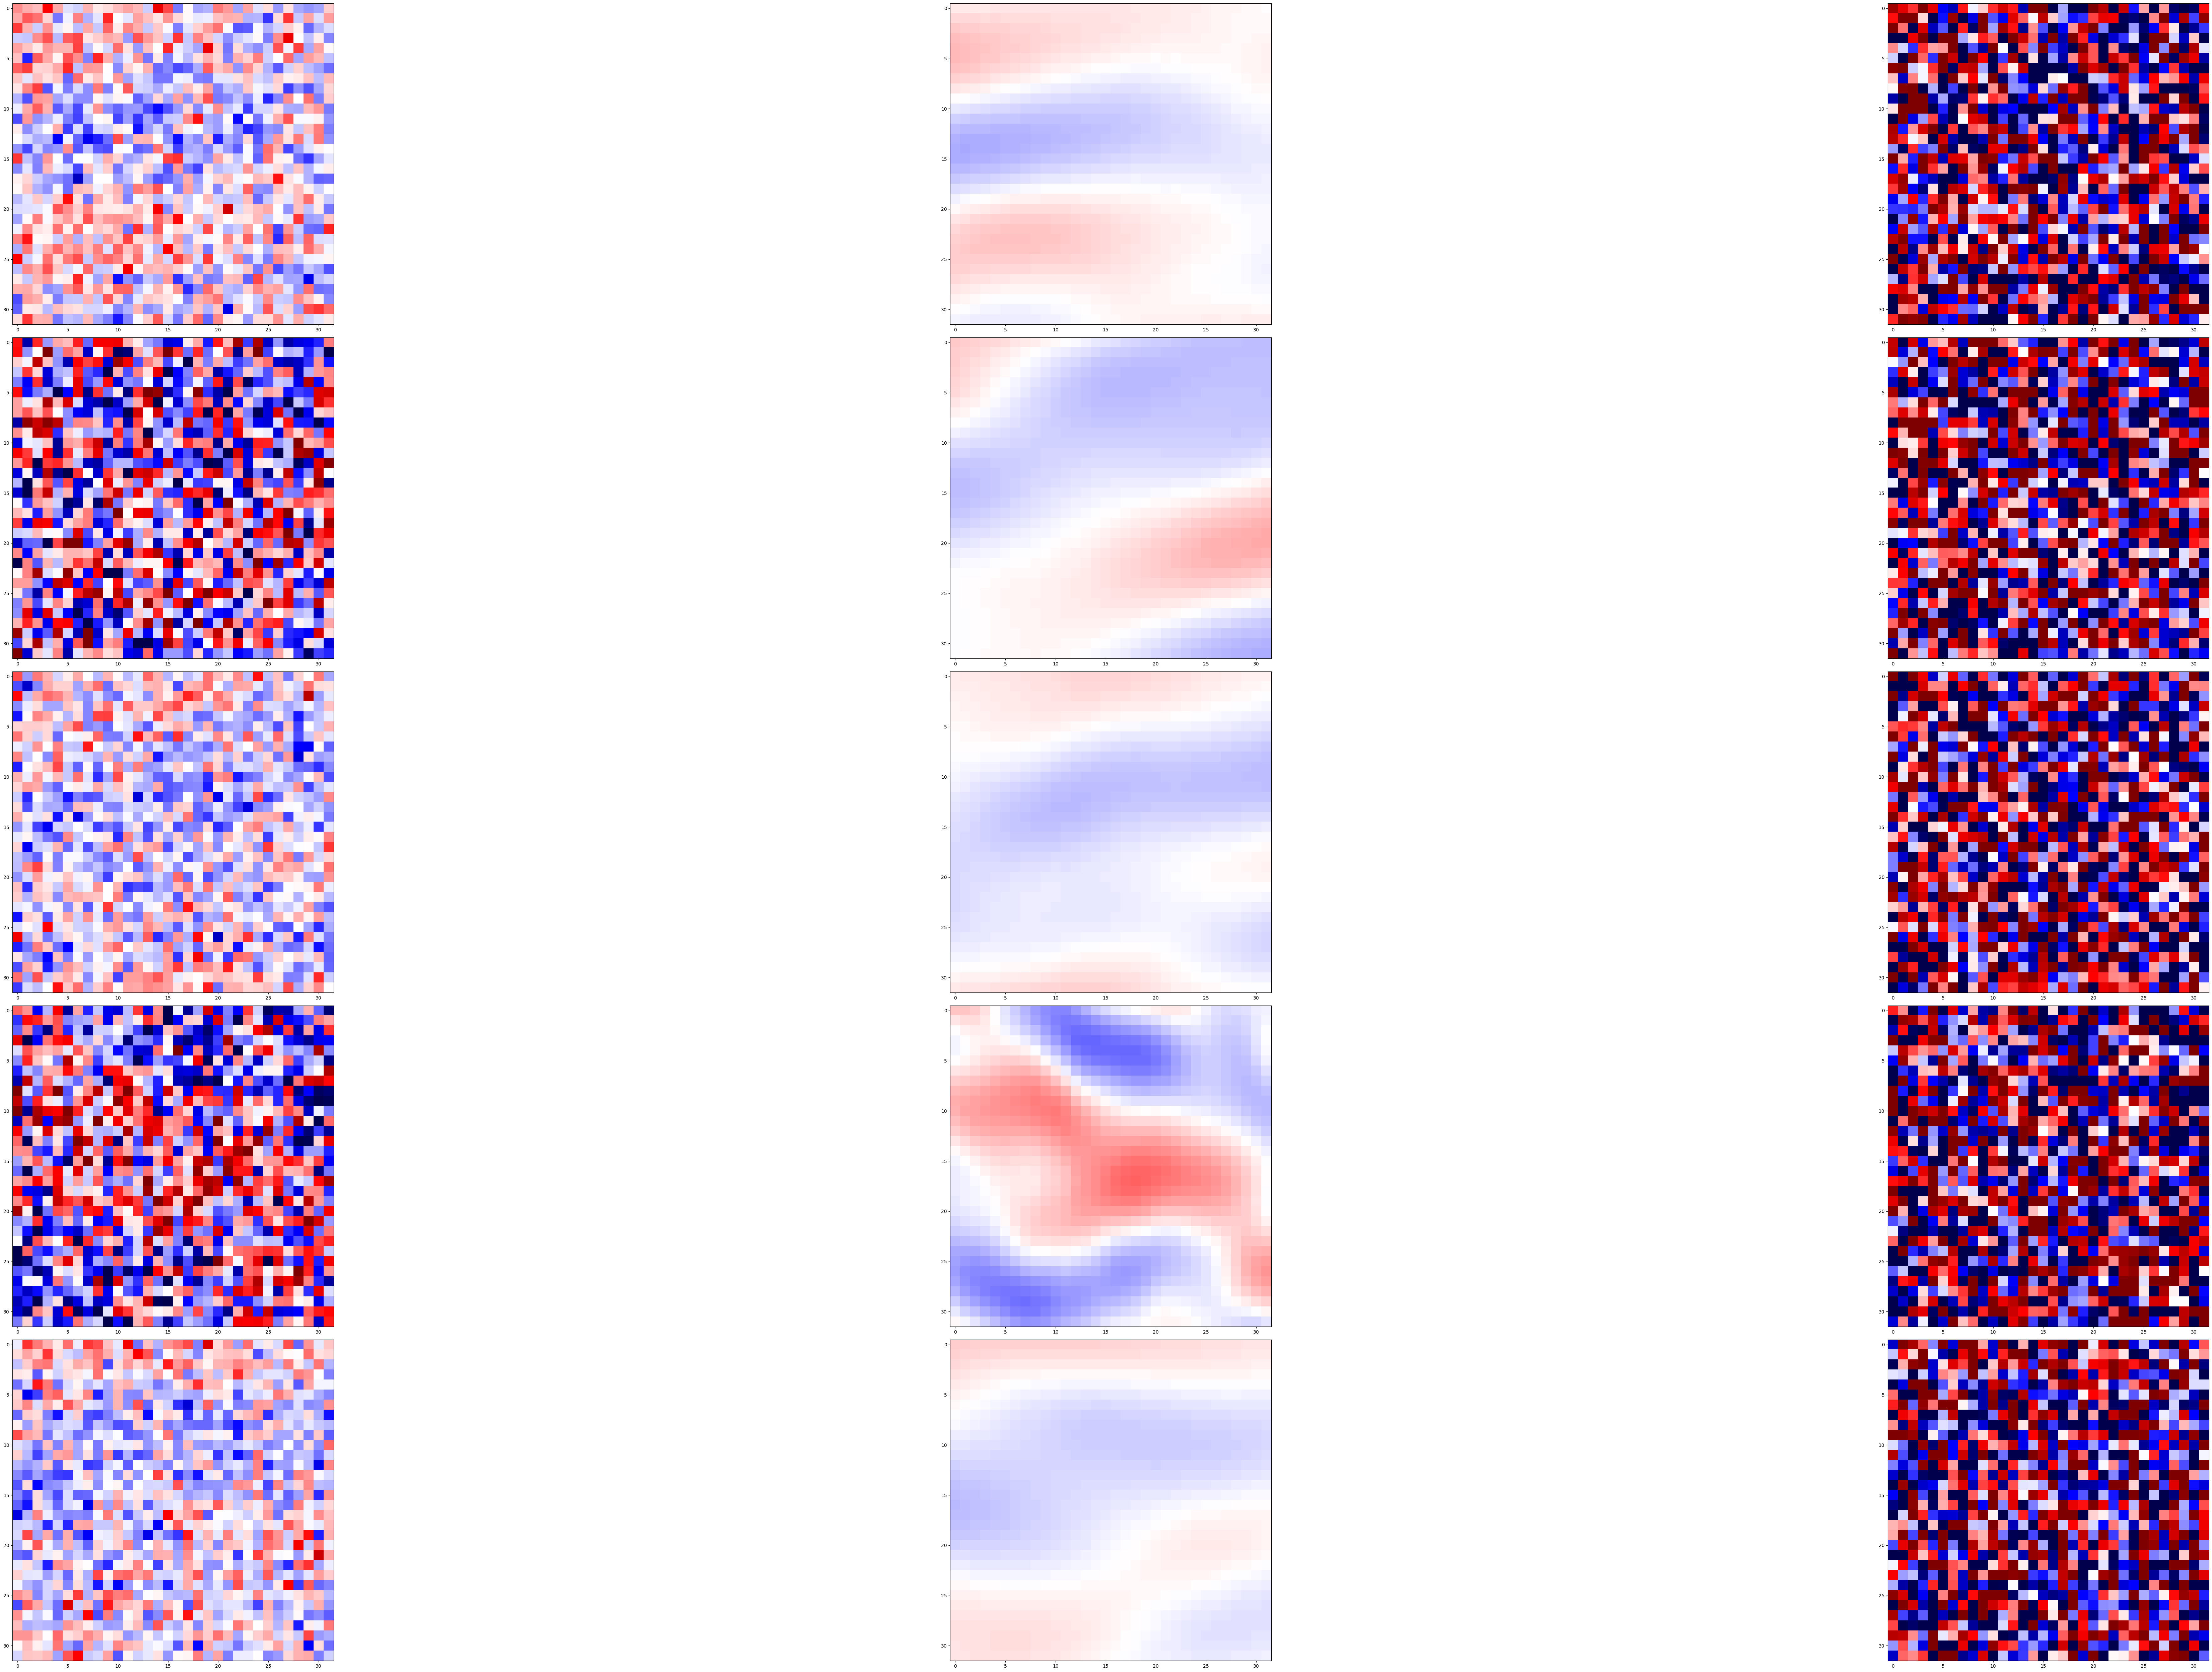

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

nimages = 5

fig, ax = plt.subplots(nrows=nimages,ncols=3, figsize=(20*nimages,10*nimages))
for i in range(nimages) :
    ax[i][0].imshow(noisy_batch[i,0], cmap='seismic',vmin=-1, vmax=1)
    ax[i][1].imshow(clean_batch[i,0], cmap='seismic',vmin=-1, vmax=1)
    ax[i][2].imshow(noise[i,0], cmap='seismic',vmin=-1, vmax=1)
fig.tight_layout()
plt.show()

An important observation to be made is, if the signal is too weak , the noise would overwhelm the patch. Hence, we could calculate a per patch mean and add noise accordingly ? Comparison saved to notebooks directory

In [20]:
worker = get_worker_info()

In [21]:
worker

: 